<a href="https://colab.research.google.com/github/manushaurya/padhaibyonefourthlabs/blob/master/0209_MorePythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

    100% |████████████████████████████████| 993kB 19.2MB/s 
Uploaded file with ID 1bXmJurFZbtjixfxtkoE9FZAilq5OOOaI


In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1QkgQpdhpJFk4cJ_a_VLezetAOn2Lg9oC


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1QkgQpdhpJFk4cJ_a_VLezetAOn2Lg9oC'
downloaded = drive.CreateFile({'id': file_id})  #https://drive.google.com/open?id=1QkgQpdhpJFk4cJ_a_VLezetAOn2Lg9oC
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned.csv')

In [0]:
!ls

adc.json  mobile_cleaned.csv  sample_data


In [0]:
import pandas as pd
df = pd.read_csv('mobile_cleaned.csv') #df for data frame and for excel file read_xls()

In [0]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [0]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,...,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,...,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,...,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,...,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,...,5,16,6,74.7,0.0,10,12,3000,2,0


In [0]:
type(df) #pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [0]:
dir(df) #lists all the functions available under data frame

In [0]:
len(df)

109

In [0]:
df.shape

(109, 40)

In [0]:
df.loc[5] 

In [0]:
df_short = df[0:10]

In [0]:
df_short.shape

(10, 40)

In [0]:
df_short.head()

In [0]:
df_thin = df[['stand_by_time','expandable_memory','price','front_camera_resolution','is_liked']]

In [0]:
df_thin.shape

(109, 5)

In [0]:
df_thin.head()

,stand_by_time,expandable_memory,price,front_camera_resolution,is_liked
0,250,64.0,3870,2.00,1
1,300,32.0,4059,0.30,1
2,329,32.0,4777,2.00,0
3,385,32.0,5799,2.00,1
4,385,32.0,5990,1.92,0


In [0]:
df_liked = df_thin[df_thin['is_liked']==1]

In [0]:
df_liked.head()

,stand_by_time,expandable_memory,price,front_camera_resolution,is_liked
0,250,64.0,3870,2.0,1
1,300,32.0,4059,0.3,1
3,385,32.0,5799,2.0,1
6,230,128.0,5999,2.0,1
7,182,32.0,6599,2.0,1


In [0]:
df_liked.shape

(92, 5)

In [0]:
df_thin['price'].mean() #describe(),count(); on column price, if column is unspecified it will describe all columns

19373.211009174312

In [0]:
df_thin[df_thin['is_liked']==1]['price'].mean() #mean price of liked phones

19393.239130434784

In [0]:
df_thin[df_thin['is_liked']==0]['price'].mean() #mean price of disliked phones

19264.823529411766

In [0]:
g = df_thin.groupby(['is_liked'])

In [0]:
for key,df_key in g:
  print(key) #key on which groupby has occurred, here 'is_liked'
  print(df_key)

In [0]:
g.mean() # where g = df_thin.groupby(['is_liked']), can use functions like max(),describe() too

,stand_by_time,expandable_memory,price,front_camera_resolution
is_liked,,,,
0,457.235294,68.235294,19264.823529,5.301176
1,394.945652,111.217391,19393.239130,4.755435


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

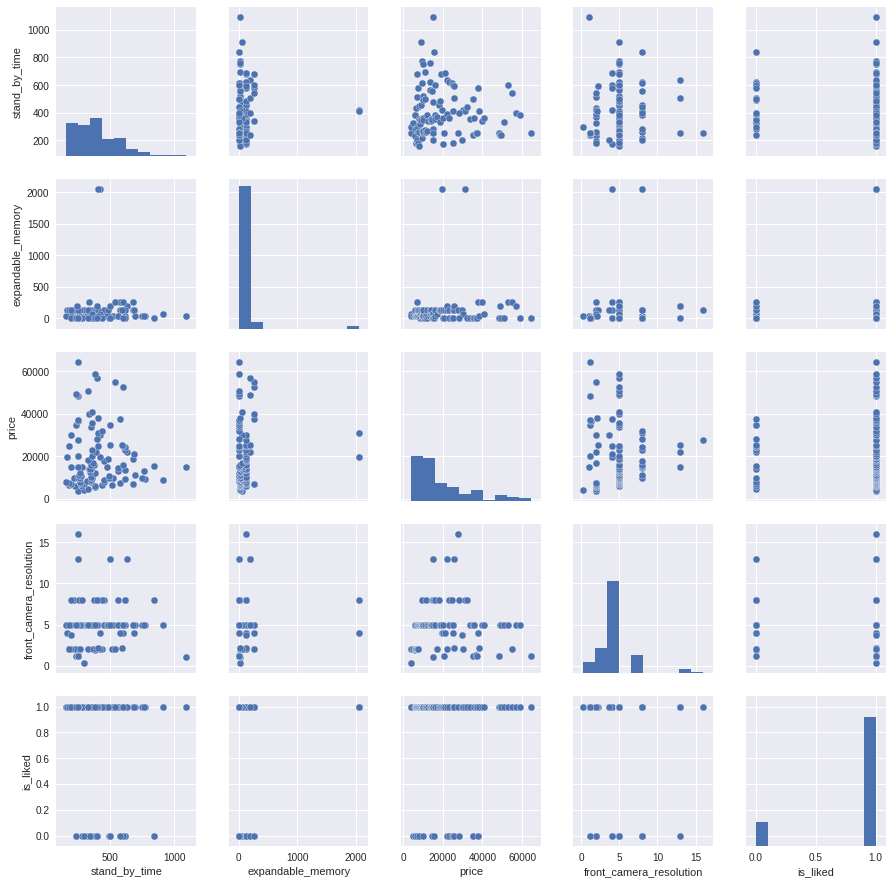

In [0]:
ax = sns.pairplot(df_thin,diag_kind='hist') #plots all the features

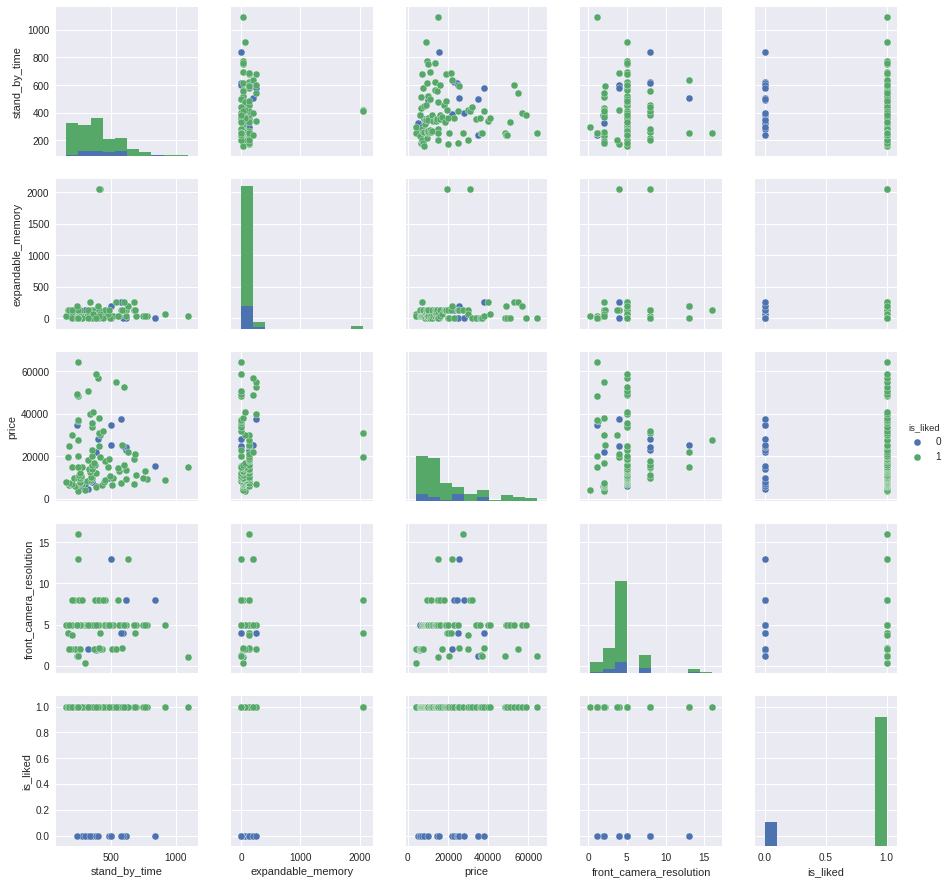

In [0]:
ax = sns.pairplot(df_thin,diag_kind='hist',hue='is_liked')

#Debugging

In [0]:
import random
def factorial(x):
  if x==0:
    return 1
  return x*factorial(x-1)
  

In [0]:
factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [0]:
def code_to_debug():
  #import pdb; pdb.set_trace() #python debugger
  for i in range(10):
    x=random.random()
    factorial(x)

In [0]:
code_to_debug() #RecursionError because random.random produces non integers and causes to recurse and recurse 

RecursionError: ignored

In [0]:
%xmode Verbose #directive, can be used to get bit more information about the bug

/usr/local/lib/python3.6/dist-packages/IPython/core/magics/basic.py:374: UserWarning: Error changing user exception modes.
Unrecognized mode in FormattedTB: <Verbose #directive, can be used to get bit more information about the bug>
Valid modes: ['Plain', 'Context', 'Verbose']
  (name,sys.exc_info()[1]))


In [0]:
def factorial_debugged(x):
  if (not isinstance(x,int)): #isinstance() checks if the x is an integer
    print('Method only supports integers.')
    return -1
  if x==0:
    return 1
  return x*factorial(x-1)

In [0]:
def code_to_debug():
  #import pdb; pdb.set_trace() #python debugger
  for i in range(10):
    x=random.random()
    factorial_debugged(x)

In [0]:
code_to_debug()

Method only supports integers.
Method only supports integers.
Method only supports integers.
Method only supports integers.
Method only supports integers.
Method only supports integers.
Method only supports integers.
Method only supports integers.
Method only supports integers.
Method only supports integers.
